# 1

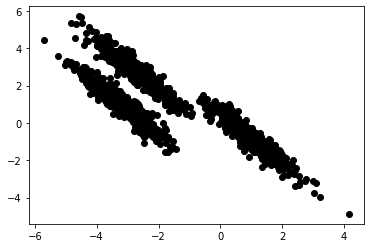

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
n_samples=1500
random_state=170
X, y = datasets.make_blobs(n_samples=n_samples,random_state=random_state)
transformation = [[0.6,-0.6],[-0.4,0.8]]
X_aniso = np.dot(X, transformation)
plt.plot(X_aniso[:,0],X_aniso[:,1],'o',color='black')
plt.show()

In [39]:
X_aniso

array([[-3.37561542,  3.63236314],
       [-3.61882807,  3.78627892],
       [-3.48552993,  0.46412084],
       ...,
       [ 1.17962827, -1.54262502],
       [-0.49738132,  0.78227797],
       [ 1.13089877, -1.13033403]])

# 2

In [3]:
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

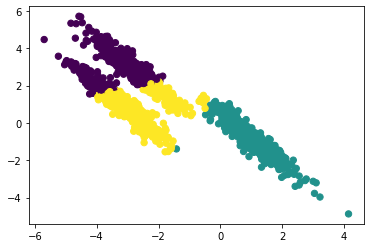

In [8]:
kmeans = KMeans(3, random_state=0)
kmeans_labels = kmeans.fit(X_aniso).predict(X_aniso)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=kmeans_labels, s=40, cmap='viridis')

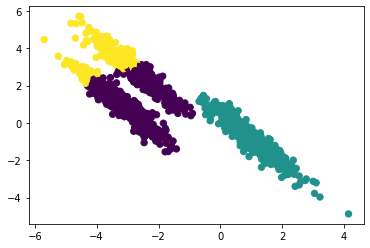

In [9]:
Agg = AgglomerativeClustering(3)
Agg_labels = Agg.fit(X_aniso).labels_
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=Agg_labels, s=40, cmap='viridis')

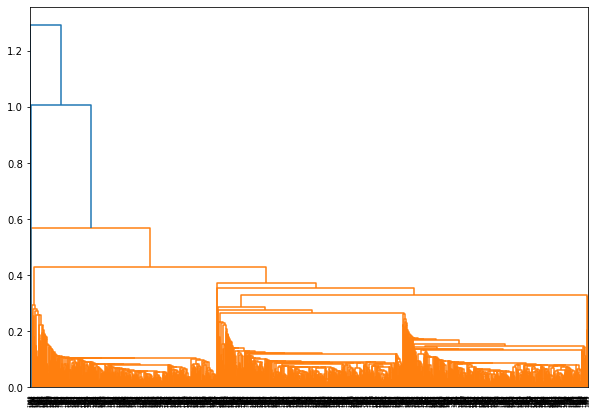

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X_aniso, 'single')

labelList = range(0, 3)

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.show()

In [53]:
X_aniso.shape

(1500, 2)

In [50]:
linked.shape

(1499, 4)

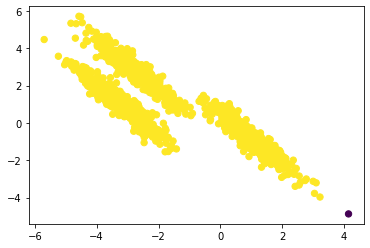

In [43]:
dbs = DBSCAN(eps = 1.6,min_samples=20, metric='minkowski', leaf_size=90, p=2)
dbs_labels = dbs.fit(X_aniso).labels_
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=dbs_labels, s=40, cmap='viridis')

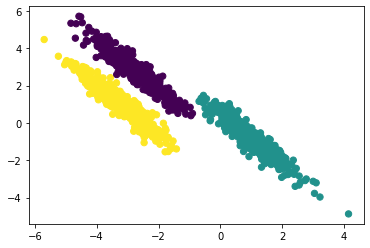

In [15]:
gmm = GaussianMixture(n_components=3).fit(X_aniso)
gmm_labels = gmm.predict(X_aniso)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=gmm_labels, s=40, cmap='viridis')

Out of all the Clustering algorithms, Gausian mixture performed the best as it clearly differentiated the classes in the dataset.
1. Kmeans algorithm could not correctly differentiate the classes provided in the dataset.

2. There are two types of hierarchical clustering: Agglomerative and Divisive. In the former, data points are clustered using a bottom-up approach starting with individual data points, while in the latter top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters. In ouur case, Agglomerative clustering could not differentiate the classes in our dataset. Rather it split 2 parts of our data into 2 seperate classes in the dataset.

3. DBSCAN algorithm is robust to outliers (noise points). DBSCAN is great at separating high density clusters from low density clusters. Unlike K-means, DBSCAN does not require number of clusters to be specified priorily. DBSCAN supports non-globular structures as well.

4. Unfortunately for our case, DBSCAN does not work well for clusters of varying density. Although it clusters high density regions separating them from low density points, it struggles a lot in case of clusters of similar density.  DBSCAN algorithm is not deterministic in the sense that it forms different clusters on different trials. The reason is that the border point that is reachable from more than one core point can join either cluster, depending on the order of processing the data points.

5. The Gaussian Mixture Algorithm(GMM) perfectly seperated the classes in our dataset. This Algorithm by far is the best amoung all our clustering alrgorithms bases on the dataset. It clearly sepreated the 3 classes in the given dataset. As we have seen in the plot generatd after we ran the Gaussian Mixture algorithm